In [2]:
import pandas as pd
import os
import numpy as np

cur_dir = os.getcwd()
path = os.path.join(cur_dir,'dataset','train.csv')
path

df_train = pd.read_csv( os.path.join(cur_dir,'dataset','train.csv'), sep=',' )
df_movies = pd.read_csv( os.path.join(cur_dir,'dataset','movies.csv'), sep='::' )
df_users = pd.read_csv( os.path.join(cur_dir,'dataset','users.csv'), sep='::' )
df_test = pd.read_csv( os.path.join(cur_dir,'dataset','test.csv'), sep=',' )
df_SampleSubmisson = pd.read_csv( os.path.join(cur_dir,'dataset','SampleSubmisson.csv'), sep=',' )

mean = df_train.Rating.mean()
std = df_train.Rating.std()
df_train['Rating_normalized'] = (df_train['Rating'] - mean)/std

all_user = np.concatenate([df_train.UserID,df_test.UserID],axis=0)
all_movie = np.concatenate([df_train.MovieID,df_test.MovieID],axis=0)
print(all_user.shape)
print(all_movie.shape)
all_user = np.unique(all_user)
all_movie = np.unique(all_movie)
print(all_user.shape)
print(all_movie.shape)


df_all_movie = pd.DataFrame({'movie_id':all_movie})
df_all_movie['movie_index'] = df_all_movie.index

df_all_user = pd.DataFrame({'user_id':all_user})
df_all_user['user_index'] = df_all_user.index


movie_id_to_index = df_all_movie.set_index('movie_id').to_dict()
movie_id_to_index = movie_id_to_index['movie_index']
user_id_to_index = df_all_user.set_index('user_id').to_dict()
user_id_to_index = user_id_to_index['user_index']

df_train['user_index'] =  df_train.apply(lambda row: user_id_to_index[row.UserID] ,axis=1)
df_train['movie_index'] =  df_train.apply(lambda row: movie_id_to_index[row.MovieID] ,axis=1)

df_train



/data1/home/feynman52/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.
/data1/home/feynman52/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


(1000209,)
(1000209,)
(6040,)
(3706,)


,TrainDataID,UserID,MovieID,Rating,Rating_normalized,user_index,movie_index
0,1,796,1193,5,1.269845,795,1104
1,2,796,661,3,-0.520828,795,639
2,3,796,914,3,-0.520828,795,853
3,4,796,3408,4,0.374509,795,3177
4,5,796,2355,5,1.269845,795,2162
5,6,796,1197,3,-0.520828,795,1107
6,7,796,1287,5,1.269845,795,1195
7,8,796,2804,5,1.269845,795,2599
8,9,796,919,4,0.374509,795,858
9,10,796,595,5,1.269845,795,581


In [3]:
df_train

,TrainDataID,UserID,MovieID,Rating,Rating_normalized,user_index,movie_index
0,1,796,1193,5,1.269845,795,1104
1,2,796,661,3,-0.520828,795,639
2,3,796,914,3,-0.520828,795,853
3,4,796,3408,4,0.374509,795,3177
4,5,796,2355,5,1.269845,795,2162
5,6,796,1197,3,-0.520828,795,1107
6,7,796,1287,5,1.269845,795,1195
7,8,796,2804,5,1.269845,795,2599
8,9,796,919,4,0.374509,795,858
9,10,796,595,5,1.269845,795,581


In [4]:

user_train = df_train.user_index
movie_train = df_train.movie_index
rating_train = df_train.Rating


In [5]:
from keras.layers import Input, Dense, Embedding, Flatten, dot, add, concatenate
from keras.models import Model
from keras.utils import get_custom_objects
import keras.backend as K
from sklearn.utils import shuffle
import matplotlib.pylab as plt

Using TensorFlow backend.


In [6]:
n_users= df_all_user.shape[0]
n_movies= df_all_movie.shape[0]
latent_dim=20
n_movies

3706

In [7]:
# build model---------------------------------------------------------
user_input = Input(shape=(1,))
movie_input = Input(shape=(1,))

user_vecter = Embedding(n_users, latent_dim, embeddings_initializer="random_normal")(user_input)
user_vecter = Flatten()(user_vecter)
movie_vecter = Embedding(n_movies, latent_dim, embeddings_initializer="random_normal")(movie_input)
movie_vecter = Flatten()(movie_vecter)
rating_predict = dot([user_vecter,movie_vecter],axes=1)

model_dot = Model([user_input,movie_input],rating_predict)

# compile model---------------------------------------------------------
def rmse(y_true, y_pred):
    y_pred = K.clip(y_pred, 1.0, 5.0)
    return K.sqrt(K.mean(K.pow(y_true - y_pred, 2)))
get_custom_objects().update({"rmse": rmse})

model_dot.compile(loss="mse", optimizer="adam", metrics=[rmse])

model_dot.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 20)        120800      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 20)        74120       input_2[0][0]                    
__________________________________________________________________________________________________
flatten_1 

In [8]:
batch_size=1000
epochs = 10
user_train2, movie_train2, rating_train2 = shuffle(user_train, movie_train, rating_train)

history_dot = model_dot.fit([user_train2, movie_train2],
                    rating_train2,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    shuffle=True)

Train on 809885 samples, validate on 89988 samples
Epoch 1/10
809885/809885 [==============================] - 7s 9us/step - loss: 11.3312 - rmse: 2.6740 - val_loss: 3.4230 - val_rmse: 1.8197
Epoch 2/10
809885/809885 [==============================] - 4s 4us/step - loss: 1.6197 - rmse: 1.2463 - val_loss: 1.0570 - val_rmse: 1.0246
Epoch 3/10
809885/809885 [==============================] - 4s 5us/step - loss: 0.9383 - rmse: 0.9664 - val_loss: 0.8890 - val_rmse: 0.9408
Epoch 4/10
809885/809885 [==============================] - 4s 5us/step - loss: 0.8576 - rmse: 0.9249 - val_loss: 0.8508 - val_rmse: 0.9208
Epoch 5/10
809885/809885 [==============================] - 3s 4us/step - loss: 0.8358 - rmse: 0.9133 - val_loss: 0.8387 - val_rmse: 0.9145
Epoch 6/10
809885/809885 [==============================] - 3s 4us/step - loss: 0.8245 - rmse: 0.9072 - val_loss: 0.8302 - val_rmse: 0.9099
Epoch 7/10
809885/809885 [==============================] - 4s 5us/step - loss: 0.8132 - rmse: 0.9010 - val_

# tsne

In [9]:
df_movies = pd.read_csv( os.path.join(cur_dir,'dataset','movies.csv'), sep='::' )
df_movies['Genres_first'] = df_movies.apply(lambda row: row['Genres'].split('|')[0] ,axis=1)
df_movies



/data1/home/feynman52/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,movieID,Title,Genres,Genres_first
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy
4,5,Father of the Bride Part II (1995),Comedy,Comedy
5,6,Heat (1995),Action|Crime|Thriller,Action
6,7,Sabrina (1995),Comedy|Romance,Comedy
7,8,Tom and Huck (1995),Adventure|Children's,Adventure
8,9,Sudden Death (1995),Action,Action
9,10,GoldenEye (1995),Action|Adventure|Thriller,Action


In [10]:
genre_list = list(df_movies['Genres_first'].value_counts().index)
# genre_list.index('Comedy')
genre_list.sort()
genre_list

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [11]:
df_movies['Genres_label'] = df_movies.apply(lambda row: genre_list.index( row['Genres_first'] ) ,axis=1)
df_movies = df_movies.rename(columns={'movieID': 'movie_id'})
df_movies



,movie_id,Title,Genres,Genres_first,Genres_label
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation,2
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,1
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,4
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy,4
4,5,Father of the Bride Part II (1995),Comedy,Comedy,4
5,6,Heat (1995),Action|Crime|Thriller,Action,0
6,7,Sabrina (1995),Comedy|Romance,Comedy,4
7,8,Tom and Huck (1995),Adventure|Children's,Adventure,1
8,9,Sudden Death (1995),Action,Action,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,Action,0


In [12]:
df_all_movie2 = pd.merge(df_all_movie, df_movies, how='left', on=['movie_id'])
df_all_movie2 

,movie_id,movie_index,Title,Genres,Genres_first,Genres_label
0,1,0,Toy Story (1995),Animation|Children's|Comedy,Animation,2
1,2,1,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,1
2,3,2,Grumpier Old Men (1995),Comedy|Romance,Comedy,4
3,4,3,Waiting to Exhale (1995),Comedy|Drama,Comedy,4
4,5,4,Father of the Bride Part II (1995),Comedy,Comedy,4
5,6,5,Heat (1995),Action|Crime|Thriller,Action,0
6,7,6,Sabrina (1995),Comedy|Romance,Comedy,4
7,8,7,Tom and Huck (1995),Adventure|Children's,Adventure,1
8,9,8,Sudden Death (1995),Action,Action,0
9,10,9,GoldenEye (1995),Action|Adventure|Thriller,Action,0


In [13]:
df_all_movie2['Genres_label'].values

array([2, 1, 4, ..., 7, 7, 7])

# embedding: (1,) => (1,3706) => (1,20)

In [14]:
movie_embedding = np.array(model_dot.layers[3].get_weights())
print(movie_embedding.shape)
movie_embedding = movie_embedding.squeeze()
print(movie_embedding.shape)

(1, 3706, 20)
(3706, 20)


In [15]:
dim_list = ['dim_%s'%(i) for i in range(movie_embedding.shape[1])]
dim_list

['dim_0',
 'dim_1',
 'dim_2',
 'dim_3',
 'dim_4',
 'dim_5',
 'dim_6',
 'dim_7',
 'dim_8',
 'dim_9',
 'dim_10',
 'dim_11',
 'dim_12',
 'dim_13',
 'dim_14',
 'dim_15',
 'dim_16',
 'dim_17',
 'dim_18',
 'dim_19']

In [16]:
df_movie_embedding = pd.DataFrame(movie_embedding,columns=dim_list)
df_movie_embedding



,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19
0,-0.679215,0.204529,0.346084,0.284295,0.680816,0.564401,0.588152,0.800035,-0.684165,-0.700569,0.219100,0.610155,0.565932,0.324282,-0.816800,-0.683194,-0.196878,0.649343,-0.502641,0.734155
1,-0.465320,0.250112,0.411415,0.337320,0.544058,0.483142,0.474182,0.478355,-0.470909,-0.366237,-0.075043,0.450670,0.413039,0.539797,-0.483692,-0.253145,-0.505418,0.555867,-0.469529,0.565977
2,-0.404106,-0.084631,0.577209,0.520855,0.411851,0.404908,0.497901,0.428041,-0.189751,-0.523314,-0.042865,0.510565,0.409351,0.594598,-0.434583,-0.292634,-0.628541,0.365935,-0.632607,0.470271
3,-0.518827,0.074006,0.381665,0.366695,0.381069,0.422989,0.214665,0.378262,-0.321234,-0.319678,0.267752,0.417867,0.357877,0.427409,-0.294637,-0.498535,-0.455407,0.577772,-0.390954,0.354963
4,-0.598347,-0.043237,0.487235,0.478553,0.372413,0.523683,0.402033,0.464260,-0.418752,-0.287066,-0.124305,0.500205,0.435338,0.569084,-0.298677,-0.370543,-0.791694,0.394045,-0.471674,0.430865
5,-0.592361,0.765676,0.466547,0.496893,0.598208,0.514646,0.717750,0.575842,-0.583061,-0.563185,0.261871,0.680984,0.524657,0.309483,-0.644991,-0.488336,-0.242343,0.323964,-0.473221,0.602965
6,-0.731628,0.282159,0.538105,0.601771,0.327517,0.444243,0.342552,0.526714,-0.370267,-0.437452,0.209587,0.557843,0.202248,0.633734,-0.460454,-0.416444,-0.719121,0.486252,-0.644709,0.601731
7,-0.401415,0.267411,0.535415,0.366652,0.365118,0.353992,0.338473,0.451388,-0.361808,-0.402454,0.350378,0.517401,0.287159,0.531802,-0.383773,-0.539332,-0.505458,0.541828,-0.514170,0.391070
8,-0.423709,0.228754,0.226116,0.277074,0.356999,0.450922,0.366340,0.317642,-0.375628,-0.320100,-0.157599,0.353413,0.529033,0.316224,-0.446916,-0.369599,-0.669264,0.272007,-0.603442,0.364685
9,-0.590356,0.478486,0.345516,0.469707,0.502420,0.565657,0.515219,0.381014,-0.383510,-0.501748,-0.438102,0.563075,0.287727,0.507046,-0.649057,-0.622942,-0.607905,0.573093,-0.643929,0.551061


In [17]:
df_movie_embedding['Genres_label'] = df_all_movie2['Genres_label'].values
df_movie_embedding

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_11,dim_12,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19,Genres_label
0,-0.679215,0.204529,0.346084,0.284295,0.680816,0.564401,0.588152,0.800035,-0.684165,-0.700569,...,0.610155,0.565932,0.324282,-0.816800,-0.683194,-0.196878,0.649343,-0.502641,0.734155,2
1,-0.465320,0.250112,0.411415,0.337320,0.544058,0.483142,0.474182,0.478355,-0.470909,-0.366237,...,0.450670,0.413039,0.539797,-0.483692,-0.253145,-0.505418,0.555867,-0.469529,0.565977,1
2,-0.404106,-0.084631,0.577209,0.520855,0.411851,0.404908,0.497901,0.428041,-0.189751,-0.523314,...,0.510565,0.409351,0.594598,-0.434583,-0.292634,-0.628541,0.365935,-0.632607,0.470271,4
3,-0.518827,0.074006,0.381665,0.366695,0.381069,0.422989,0.214665,0.378262,-0.321234,-0.319678,...,0.417867,0.357877,0.427409,-0.294637,-0.498535,-0.455407,0.577772,-0.390954,0.354963,4
4,-0.598347,-0.043237,0.487235,0.478553,0.372413,0.523683,0.402033,0.464260,-0.418752,-0.287066,...,0.500205,0.435338,0.569084,-0.298677,-0.370543,-0.791694,0.394045,-0.471674,0.430865,4
5,-0.592361,0.765676,0.466547,0.496893,0.598208,0.514646,0.717750,0.575842,-0.583061,-0.563185,...,0.680984,0.524657,0.309483,-0.644991,-0.488336,-0.242343,0.323964,-0.473221,0.602965,0
6,-0.731628,0.282159,0.538105,0.601771,0.327517,0.444243,0.342552,0.526714,-0.370267,-0.437452,...,0.557843,0.202248,0.633734,-0.460454,-0.416444,-0.719121,0.486252,-0.644709,0.601731,4
7,-0.401415,0.267411,0.535415,0.366652,0.365118,0.353992,0.338473,0.451388,-0.361808,-0.402454,...,0.517401,0.287159,0.531802,-0.383773,-0.539332,-0.505458,0.541828,-0.514170,0.391070,1
8,-0.423709,0.228754,0.226116,0.277074,0.356999,0.450922,0.366340,0.317642,-0.375628,-0.320100,...,0.353413,0.529033,0.316224,-0.446916,-0.369599,-0.669264,0.272007,-0.603442,0.364685,0
9,-0.590356,0.478486,0.345516,0.469707,0.502420,0.565657,0.515219,0.381014,-0.383510,-0.501748,...,0.563075,0.287727,0.507046,-0.649057,-0.622942,-0.607905,0.573093,-0.643929,0.551061,0


In [18]:
arr_tsne = df_movie_embedding[dim_list].values
arr_tsne.shape

(3706, 20)

In [19]:
import time

from sklearn.manifold import TSNE


time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, random_state=0, perplexity=80)
tsne_results = tsne.fit_transform(  arr_tsne )

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 3706 samples in 0.010s...
[t-SNE] Computed neighbors for 3706 samples in 0.885s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3706
[t-SNE] Computed conditional probabilities for sample 2000 / 3706
[t-SNE] Computed conditional probabilities for sample 3000 / 3706
[t-SNE] Computed conditional probabilities for sample 3706 / 3706
[t-SNE] Mean sigma: 0.158143
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.960510
[t-SNE] KL divergence after 1000 iterations: 1.541284


In [20]:
tsne_results.shape


(3706, 2)

In [21]:
df_movie_embedding['x-tsne'] = tsne_results[:,0]
df_movie_embedding['y-tsne'] = tsne_results[:,1]
df_movie_embedding

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_13,dim_14,dim_15,dim_16,dim_17,dim_18,dim_19,Genres_label,x-tsne,y-tsne
0,-0.679215,0.204529,0.346084,0.284295,0.680816,0.564401,0.588152,0.800035,-0.684165,-0.700569,...,0.324282,-0.816800,-0.683194,-0.196878,0.649343,-0.502641,0.734155,2,5.448024,18.457973
1,-0.465320,0.250112,0.411415,0.337320,0.544058,0.483142,0.474182,0.478355,-0.470909,-0.366237,...,0.539797,-0.483692,-0.253145,-0.505418,0.555867,-0.469529,0.565977,1,13.848179,1.387871
2,-0.404106,-0.084631,0.577209,0.520855,0.411851,0.404908,0.497901,0.428041,-0.189751,-0.523314,...,0.594598,-0.434583,-0.292634,-0.628541,0.365935,-0.632607,0.470271,4,15.517769,-4.801129
3,-0.518827,0.074006,0.381665,0.366695,0.381069,0.422989,0.214665,0.378262,-0.321234,-0.319678,...,0.427409,-0.294637,-0.498535,-0.455407,0.577772,-0.390954,0.354963,4,11.815622,-12.610494
4,-0.598347,-0.043237,0.487235,0.478553,0.372413,0.523683,0.402033,0.464260,-0.418752,-0.287066,...,0.569084,-0.298677,-0.370543,-0.791694,0.394045,-0.471674,0.430865,4,17.150248,-0.927685
5,-0.592361,0.765676,0.466547,0.496893,0.598208,0.514646,0.717750,0.575842,-0.583061,-0.563185,...,0.309483,-0.644991,-0.488336,-0.242343,0.323964,-0.473221,0.602965,0,2.019531,17.373404
6,-0.731628,0.282159,0.538105,0.601771,0.327517,0.444243,0.342552,0.526714,-0.370267,-0.437452,...,0.633734,-0.460454,-0.416444,-0.719121,0.486252,-0.644709,0.601731,4,8.853466,2.255388
7,-0.401415,0.267411,0.535415,0.366652,0.365118,0.353992,0.338473,0.451388,-0.361808,-0.402454,...,0.531802,-0.383773,-0.539332,-0.505458,0.541828,-0.514170,0.391070,1,3.162001,-7.657788
8,-0.423709,0.228754,0.226116,0.277074,0.356999,0.450922,0.366340,0.317642,-0.375628,-0.320100,...,0.316224,-0.446916,-0.369599,-0.669264,0.272007,-0.603442,0.364685,0,19.702873,-4.173604
9,-0.590356,0.478486,0.345516,0.469707,0.502420,0.565657,0.515219,0.381014,-0.383510,-0.501748,...,0.507046,-0.649057,-0.622942,-0.607905,0.573093,-0.643929,0.551061,0,17.814655,7.279365


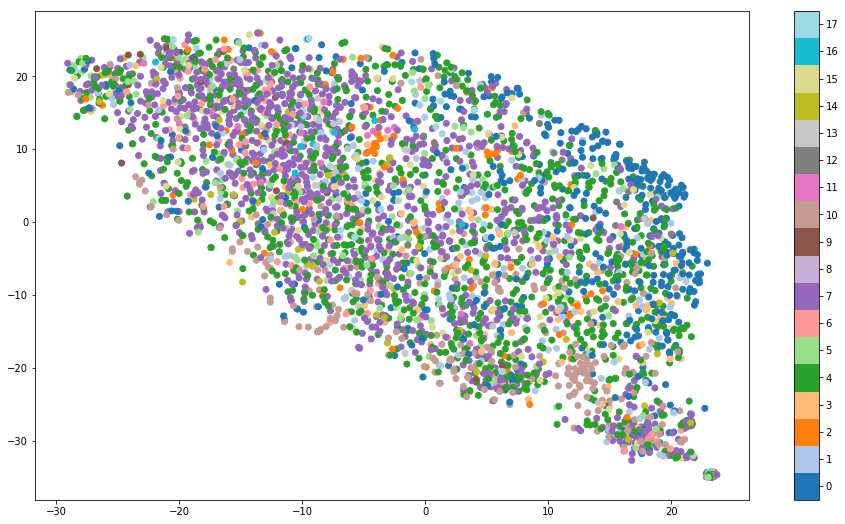

In [22]:
plt.figure(figsize=(16,9))
cmap = plt.cm.get_cmap("tab20", 18)

x = df_movie_embedding['x-tsne'].values
y = df_movie_embedding['y-tsne'].values
c = df_movie_embedding['Genres_label'].values


sc = plt.scatter(x, y, c=c, cmap=cmap)

plt.colorbar(ticks=range(18))
plt.clim(-0.5, 17.5)

plt.show()

In [23]:
df_Genres = pd.DataFrame(genre_list)
df_Genres

,0
0,Action
1,Adventure
2,Animation
3,Children's
4,Comedy
5,Crime
6,Documentary
7,Drama
8,Fantasy
9,Film-Noir
